In [1]:
# !pip install seaborn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed
import numpy as np
import cv2

# Import matplotlib libraries
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display

import mediapipe as mp
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import pandas as pd
import numpy as np

import math

In [20]:
# # Load the dataset
# dfMP = pd.read_csv('GolfMediaPipeData.csv' )
# dfM = pd.read_csv('GolfMovenetData.csv')
# dfOP = pd.read_csv('GolfOpenPoseData.csv')

# X = dfMP[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# X = X.values
# y = dfMP[['Label']]
# y = y.values

# X1 = dfM[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# X1 = X1.values
# y1 = dfM[['Label']]
# y1 = y1.values

# X2 = dfOP[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# X2 = X2.values
# y2 = dfOP[['Label']]
# y2 = y2.values




In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2)
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

In [43]:
# import pickle
# from sklearn.model_selection import train_test_split

# # Split data into training and testing sets
# split_data = {"X_train": X_train, "X_test": X_test, "y_train": y_train, "y_test": y_test}
# split_data1 = {"X_train": X_train1, "X_test": X_test1, "y_train": y_train1, "y_test": y_test1}
# split_data2 = {"X_train": X_train2, "X_test": X_test2, "y_train": y_train2, "y_test": y_test2}

# # Save the splits as a dictionary
# with open("split_data.pickle", "wb") as f:
#     pickle.dump(split_data, f)
#     pickle.dump(split_data1, f)
#     pickle.dump(split_data2, f)


In [3]:
import pickle

# Load the pickle file
with open("split_data.pickle", "rb") as f:
    split_data = pickle.load(f)
    split_data1 = pickle.load(f)
    split_data2 = pickle.load(f)

# Retrieve the splits from the dictionary
X_train = split_data["X_train"]
X_test = split_data["X_test"]
y_train = split_data["y_train"]
y_test = split_data["y_test"]

X_train1 = split_data1["X_train"]
X_test1 = split_data1["X_test"]
y_train1 = split_data1["y_train"]
y_test1 = split_data1["y_test"]

X_train2 = split_data2["X_train"]
X_test2 = split_data2["X_test"]
y_train2 = split_data2["y_train"]
y_test2 = split_data2["y_test"]


In [28]:
#######MEDIAPIPE##########
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print("Mediapipe RBF Model Accuracy:", accuracy)

##########MOVENET##############
# initialize a StandardScaler object
scaler = StandardScaler()

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

clf1 = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
clf1.fit(X_train_scaled1, y_train1)

y_pred1 = clf1.predict(X_test_scaled1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Movenet RBF Model Accuracy:", accuracy1)

###########OPENPOSE#############
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

clf2 = SVC(kernel='rbf', gamma=0.1, C=1, probability=True)
clf2.fit(X_train_scaled2, y_train2)

y_pred2 = clf2.predict(X_test_scaled2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Openpose RBF Model Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mediapipe RBF Model Accuracy: 0.8732673267326733


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Movenet RBF Model Accuracy: 0.7677419354838709


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Openpose RBF Model Accuracy: 0.592326139088729


In [63]:
#######MEDIAPIPE##########
scaler = StandardScaler()
print(X_test)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = SVC(kernel='linear', C=1, probability=True)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Mediapipe RBF Model Accuracy:", accuracy)

##########MOVENET##############
scaler = StandardScaler()

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

clf1 = SVC(kernel='linear', C=1, probability=True)
clf1.fit(X_train_scaled1, y_train1)

y_pred1 = clf1.predict(X_test_scaled1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Movenet Linear Model Accuracy:", accuracy1)

###########OPENPOSE#############
scaler = StandardScaler()


X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

clf2 = SVC(kernel='linear', C=1, probability=True)
clf2.fit(X_train_scaled2, y_train2)

y_pred2 = clf2.predict(X_test_scaled2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Openpose Linear Model Accuracy:", accuracy2)

[[167.72529845 140.20296872   4.32740548 ... 154.03930163 167.37548547
  144.32465531]
 [178.9752945  163.68659623   4.7075045  ... 156.51894758 170.28552177
  172.21685439]
 [151.00014427 138.38292492  68.06257382 ... 167.97079441 174.62786664
  172.76310368]
 ...
 [155.75606387 155.15668434  78.73563167 ... 153.74519748 176.1449391
  165.0038865 ]
 [154.72933371 129.71217572  71.49457029 ... 161.27186944 174.49960844
  171.53100986]
 [159.41549392 172.87567442   5.60170465 ... 145.12870303 170.04840505
  169.47445903]]


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mediapipe RBF Model Accuracy: 0.8277227722772277


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Movenet Linear Model Accuracy: 0.7354838709677419


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Openpose Linear Model Accuracy: 0.5563549160671463


In [56]:
#######MEDIAPIPE##########
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = SVC(kernel='poly', degree=3, C=1, probability=True)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Mediapipe Polynomial Model Accuracy:", accuracy)

##########MOVENET##############
scaler = StandardScaler()

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

clf1 = SVC(kernel='poly', degree=3, C=1, probability=True)
clf1.fit(X_train_scaled1, y_train1)

y_pred1 = clf1.predict(X_test_scaled1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Movenet Polynomial Model Accuracy:", accuracy1)

###########OPENPOSE#############
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

clf2 = SVC(kernel='poly', degree=3, C=1, probability=True)
clf2.fit(X_train_scaled2, y_train2)

y_pred2 = clf2.predict(X_test_scaled2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Openpose Polynomial Model Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mediapipe Polynomial Model Accuracy: 0.8554455445544554


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Movenet Polynomial Model Accuracy: 0.7483870967741936


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Openpose Polynomial Model Accuracy: 0.5467625899280576


In [48]:
#######MEDIAPIPE##########
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(kernel='sigmoid', C=1, probability=True)
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Mediapipe sigmoid Model Accuracy:", accuracy)

##########MOVENET##############
scaler = StandardScaler()

X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

clf1 = SVC(kernel='sigmoid', C=1, probability=True)
clf1.fit(X_train_scaled1, y_train1)

y_pred1 = clf1.predict(X_test_scaled1)

accuracy1 = accuracy_score(y_test1, y_pred1)
print("Movenet Polynosigmoidmial Model Accuracy:", accuracy1)

###########OPENPOSE#############
scaler = StandardScaler()

X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

clf2 = SVC(kernel='sigmoid', C=1, probability=True)
clf2.fit(X_train_scaled2, y_train2)

y_pred2 = clf2.predict(X_test_scaled2)

accuracy2 = accuracy_score(y_test2, y_pred2)
print("Openpose sigmoid Model Accuracy:", accuracy2)

c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mediapipe sigmoid Model Accuracy: 0.697029702970297


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Movenet Polynosigmoidmial Model Accuracy: 0.5913978494623656


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Openpose sigmoid Model Accuracy: 0.4292565947242206


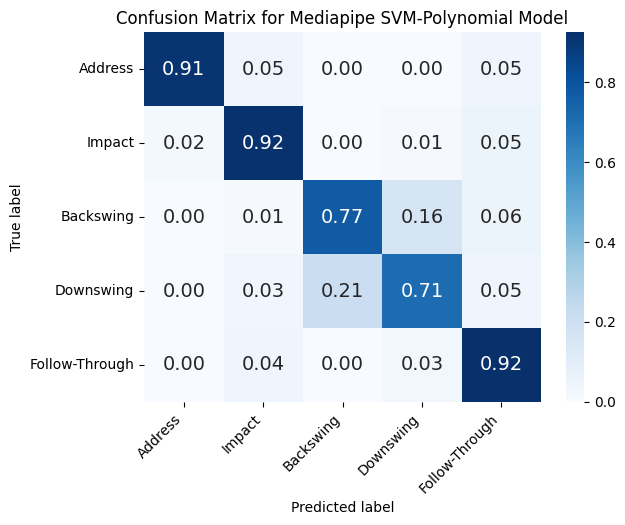

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

labels = {1: "Address", 2: "Impact", 3: "Backswing", 4: "Downswing", 5: "Follow-Through"}
label_names = [labels[i] for i in np.unique(y_test)]

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=label_names, yticklabels=label_names, annot_kws={"fontsize":14})

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Mediapipe SVM-Polynomial Model')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()




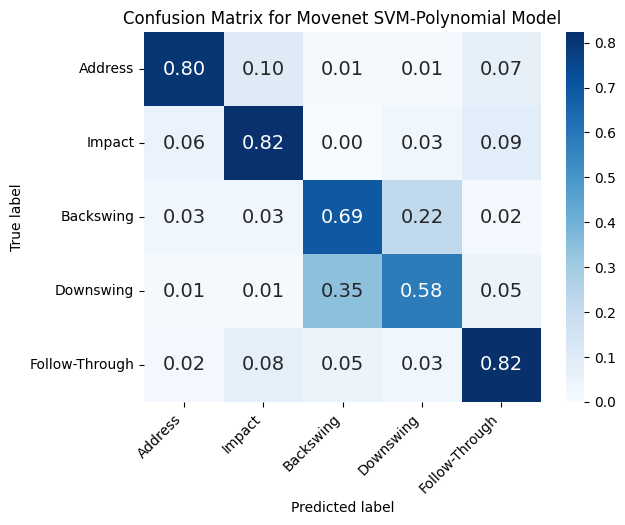

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test1, y_pred1)

labels = {1: "Address", 2: "Impact", 3: "Backswing", 4: "Downswing", 5: "Follow-Through"}
label_names = [labels[i] for i in np.unique(y_test)]

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=label_names, yticklabels=label_names, annot_kws={"fontsize":14})

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Movenet SVM-Polynomial Model')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()


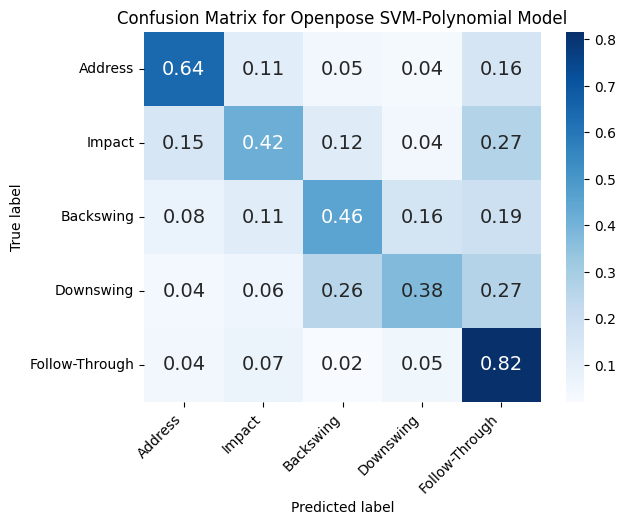

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test2, y_pred2)

labels = {1: "Address", 2: "Impact", 3: "Backswing", 4: "Downswing", 5: "Follow-Through"}
label_names = [labels[i] for i in np.unique(y_test)]

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=label_names, yticklabels=label_names, annot_kws={"fontsize":14})

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Openpose SVM-Polynomial Model')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversio

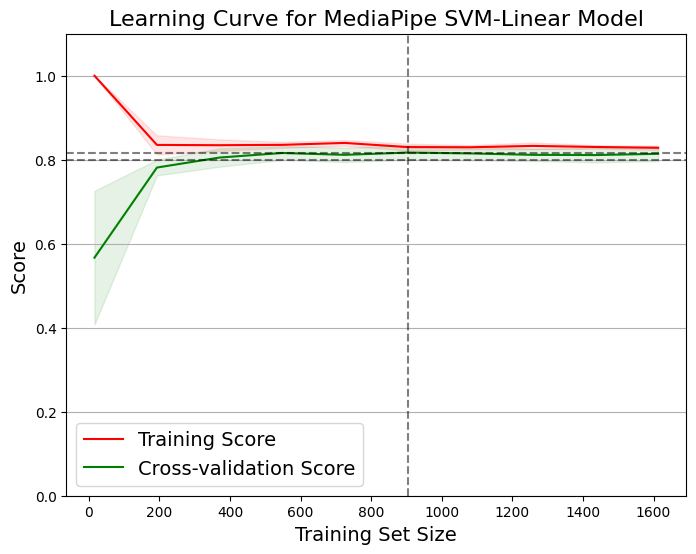

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define the training set sizes to use
train_sizes = np.linspace(0.01, 1.0, 10)

# calculate the learning curve scores
train_sizes_abs, train_scores, test_scores = learning_curve(
    clf, X_train_scaled, y_train, train_sizes=train_sizes, cv=5)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Learning Curve for MediaPipe SVM-Linear Model', fontsize=16)
ax.set_xlabel('Training Set Size', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_ylim(0.0, 1.1)
ax.grid(axis='y')

# plot the shaded area for the standard deviation of the training score
ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')

# plot the shaded area for the standard deviation of the test score
ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

# plot the mean training and test scores
ax.plot(train_sizes_abs, train_scores_mean, '-', color='r',
         label='Training Score')
ax.plot(train_sizes_abs, test_scores_mean, '-', color='g',
         label='Cross-validation Score')

# add a legend
ax.legend(loc='best', fontsize=14)

# add a horizontal line at the maximum test score
max_test_score_idx = np.argmax(test_scores_mean)
max_test_score = test_scores_mean[max_test_score_idx]
ax.axhline(max_test_score, linestyle='--', color='black', alpha=0.5)

# add vertical and horizontal lines for reference
ax.axvline(train_sizes_abs[max_test_score_idx], linestyle='--', color='black', alpha=0.5)
ax.axhline(0.8, linestyle='--', color='black', alpha=0.5)

plt.show()


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversio

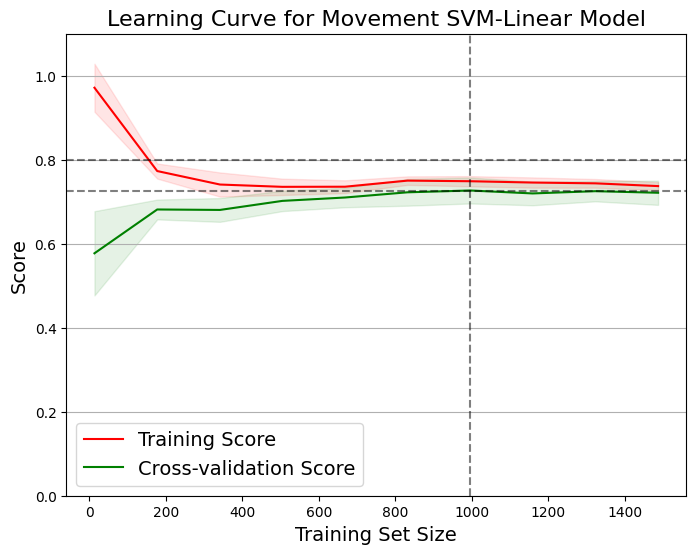

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define the training set sizes to use
train_sizes = np.linspace(0.01, 1.0, 10)

# calculate the learning curve scores
train_sizes_abs, train_scores, test_scores = learning_curve(
    clf1, X_train_scaled1, y_train1, train_sizes=train_sizes, cv=5)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Learning Curve for Movement SVM-Linear Model', fontsize=16)
ax.set_xlabel('Training Set Size', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_ylim(0.0, 1.1)
ax.grid(axis='y')

# plot the shaded area for the standard deviation of the training score
ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')

# plot the shaded area for the standard deviation of the test score
ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

# plot the mean training and test scores
ax.plot(train_sizes_abs, train_scores_mean, '-', color='r',
         label='Training Score')
ax.plot(train_sizes_abs, test_scores_mean, '-', color='g',
         label='Cross-validation Score')

# add a legend
ax.legend(loc='best', fontsize=14)

# add a horizontal line at the maximum test score
max_test_score_idx = np.argmax(test_scores_mean)
max_test_score = test_scores_mean[max_test_score_idx]
ax.axhline(max_test_score, linestyle='--', color='black', alpha=0.5)

# add vertical and horizontal lines for reference
ax.axvline(train_sizes_abs[max_test_score_idx], linestyle='--', color='black', alpha=0.5)
ax.axhline(0.8, linestyle='--', color='black', alpha=0.5)

plt.show()


c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Crim\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1141: DataConversio

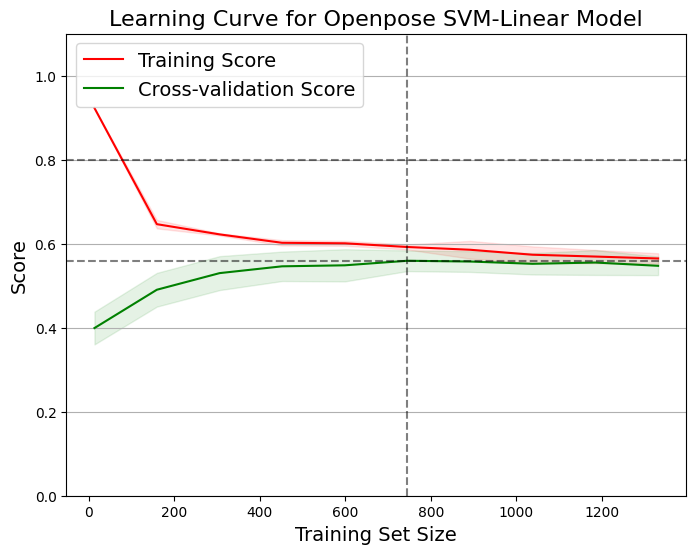

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# define the training set sizes to use
train_sizes = np.linspace(0.01, 1.0, 10)

# calculate the learning curve scores
train_sizes_abs, train_scores, test_scores = learning_curve(
    clf2, X_train_scaled2, y_train2, train_sizes=train_sizes, cv=5)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Learning Curve for Openpose SVM-Linear Model', fontsize=16)
ax.set_xlabel('Training Set Size', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_ylim(0.0, 1.1)
ax.grid(axis='y')

# plot the shaded area for the standard deviation of the training score
ax.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')

# plot the shaded area for the standard deviation of the test score
ax.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color='g')

# plot the mean training and test scores
ax.plot(train_sizes_abs, train_scores_mean, '-', color='r',
         label='Training Score')
ax.plot(train_sizes_abs, test_scores_mean, '-', color='g',
         label='Cross-validation Score')

# add a legend
ax.legend(loc='best', fontsize=14)

# add a horizontal line at the maximum test score
max_test_score_idx = np.argmax(test_scores_mean)
max_test_score = test_scores_mean[max_test_score_idx]
ax.axhline(max_test_score, linestyle='--', color='black', alpha=0.5)

# add vertical and horizontal lines for reference
ax.axvline(train_sizes_abs[max_test_score_idx], linestyle='--', color='black', alpha=0.5)
ax.axhline(0.8, linestyle='--', color='black', alpha=0.5)

plt.show()


In [8]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_pose = mp.solutions.pose
mp_drawing_styles = mp.solutions.drawing_styles
pose = mp_pose.Pose()


def calculate_angles(firstPoint, midPoint, lastPoint):
  result = math.degrees(math.atan2(lastPoint.y  - midPoint.y, lastPoint.x - midPoint.x) - math.atan2(firstPoint.y - midPoint.y, firstPoint.x - midPoint.x))
  result = abs(result) 
  # 
  if result > 180:
      result = 360.0 - result
  return result

def extract_angles_test(results):
  if results.pose_landmarks is None:
      return None
  
  # Calculates the essential angles for each image and adds them to the array
  left_elbow_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST] , results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER])
  right_elbow_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER])
  left_shoulder_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP])
  right_shoulder_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP])
  left_hip_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE])
  right_hip_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE])
  left_knee_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE], results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL])
  right_knee_angles = calculate_angles(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE], results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL])

  return [[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles]]

In [9]:
#@title Helper functions for visualization
left_shoulder = []
right_shoulder = []
left_elbow = []
right_elbow = []
left_wrist = []
right_wrist = []
left_hip = []
right_hip = []
left_knee = []
right_knee = []
left_ankle = []
right_ankle = []

def calculate_angles_movenet(firstPoint, midPoint, lastPoint):
  result = math.degrees(math.atan2(lastPoint[1]  - midPoint[1], lastPoint[0] - midPoint[0]) - math.atan2(firstPoint[1] - midPoint[1], firstPoint[0] - midPoint[0]))
  result = abs(result) 
  
  if result > 180:
      result = 360.0 - result 
  return result

KEYPOINT_DICT = {
    'nose': 0,
    'left_eye': 1,
    'right_eye': 2,
    'left_ear': 3,
    'right_ear': 4,
    'left_shoulder': 5,
    'right_shoulder': 6,
    'left_elbow': 7,
    'right_elbow': 8,
    'left_wrist': 9,
    'right_wrist': 10,
    'left_hip': 11,
    'right_hip': 12,
    'left_knee': 13,
    'right_knee': 14,
    'left_ankle': 15,
    'right_ankle': 16
}

KEYPOINT_EDGE_INDS_TO_COLOR = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

def _keypoints_and_edges_for_display(keypoints_with_scores,
                                     height,
                                     width,
                                     keypoint_threshold=0.11):
  """Returns high confidence keypoints and edges for visualization.

  Args:
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    height: height of the image in pixels.
    width: width of the image in pixels.
    keypoint_threshold: minimum confidence score for a keypoint to be
      visualized.

  Returns:
    A (keypoints_xy, edges_xy, edge_colors) containing:
      * the coordinates of all keypoints of all detected entities;
      * the coordinates of all skeleton edges of all detected entities;
      * the colors in which the edges should be plotted.
  """
  keypoints_all = []
  keypoint_edges_all = []
  edge_colors = []
  num_instances, _, _, _ = keypoints_with_scores.shape
  for idx in range(num_instances):
    kpts_x = keypoints_with_scores[0, idx, :, 1]
    kpts_y = keypoints_with_scores[0, idx, :, 0]
    kpts_scores = keypoints_with_scores[0, idx, :, 2]
    kpts_absolute_xy = np.stack(
        [width * np.array(kpts_x), height * np.array(kpts_y)], axis=-1)
    kpts_above_thresh_absolute = kpts_absolute_xy[
        kpts_scores > keypoint_threshold, :]
    keypoints_all.append(kpts_above_thresh_absolute)

    for edge_pair, color in KEYPOINT_EDGE_INDS_TO_COLOR.items():
      if (kpts_scores[edge_pair[0]] > keypoint_threshold and
          kpts_scores[edge_pair[1]] > keypoint_threshold):
        x_start = kpts_absolute_xy[edge_pair[0], 0]
        y_start = kpts_absolute_xy[edge_pair[0], 1]
        x_end = kpts_absolute_xy[edge_pair[1], 0]
        y_end = kpts_absolute_xy[edge_pair[1], 1]
        line_seg = np.array([[x_start, y_start], [x_end, y_end]])
        keypoint_edges_all.append(line_seg)
        edge_colors.append(color)
  if keypoints_all:
    keypoints_xy = np.concatenate(keypoints_all, axis=0)
  else:
    keypoints_xy = np.zeros((0, 17, 2))

  if keypoint_edges_all:
    edges_xy = np.stack(keypoint_edges_all, axis=0)
  else:
    edges_xy = np.zeros((0, 2, 2))
  return keypoints_xy, edges_xy, edge_colors


def draw_prediction_on_image(
    image, keypoints_with_scores, crop_region=None, close_figure=False,
    output_image_height=None):
  """Draws the keypoint predictions on image.

  Args:
    image: A numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    keypoints_with_scores: A numpy array with shape [1, 1, 17, 3] representing
      the keypoint coordinates and scores returned from the MoveNet model.
    crop_region: A dictionary that defines the coordinates of the bounding box
      of the crop region in normalized coordinates (see the init_crop_region
      function below for more detail). If provided, this function will also
      draw the bounding box on the image.
    output_image_height: An integer indicating the height of the output image.
      Note that the image aspect ratio will be the same as the input image.

  Returns:
    A numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  # To remove the huge white borders
  fig.tight_layout(pad=0)
  ax.margins(0)
  ax.set_yticklabels([])
  ax.set_xticklabels([])
  plt.axis('off')

  im = ax.imshow(image)
  line_segments = LineCollection([], linewidths=(4), linestyle='solid')
  ax.add_collection(line_segments)
  # Turn off tick labels
  scat = ax.scatter([], [], s=60, color='#FF1493', zorder=3)

  (keypoint_locs, keypoint_edges,
   edge_colors) = _keypoints_and_edges_for_display(
       keypoints_with_scores, height, width)

  line_segments.set_segments(keypoint_edges)
  line_segments.set_color(edge_colors)
  if keypoint_edges.shape[0]:
    line_segments.set_segments(keypoint_edges)
    line_segments.set_color(edge_colors)
  if keypoint_locs.shape[0]:
    scat.set_offsets(keypoint_locs)

  if crop_region is not None:
    xmin = max(crop_region['x_min'] * width, 0.0)
    ymin = max(crop_region['y_min'] * height, 0.0)
    rec_width = min(crop_region['x_max'], 0.99) * width - xmin
    rec_height = min(crop_region['y_max'], 0.99) * height - ymin
    rect = patches.Rectangle(
        (xmin,ymin),rec_width,rec_height,
        linewidth=1,edgecolor='b',facecolor='none')
    ax.add_patch(rect)

  fig.canvas.draw()
  image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
  image_from_plot = image_from_plot.reshape(
      fig.canvas.get_width_height()[::-1] + (3,))
  plt.close(fig)
  if output_image_height is not None:
    output_image_width = int(output_image_height / height * width)
    image_from_plot = cv2.resize(
        image_from_plot, dsize=(output_image_width, output_image_height),
         interpolation=cv2.INTER_CUBIC)
  return image_from_plot

def to_gif(images, fps):
  """Converts image sequence (4D numpy array) to gif."""
  imageio.mimsave('./animation.gif', images, fps=fps)
  return embed.embed_file('./animation.gif')

def progress(value, max=100):
  return HTML("""
      <progress
          value='{value}'
          max='{max}',
          style='width: 100%'
      >
          {value}
      </progress>
  """.format(value=value, max=max))

In [10]:
model_name = "movenet_lightning"

if "tflite" in model_name:
  if "movenet_lightning_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/float16/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_f16" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/float16/4?lite-format=tflite
    input_size = 256
  elif "movenet_lightning_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/lightning/tflite/int8/4?lite-format=tflite
    input_size = 192
  elif "movenet_thunder_int8" in model_name:
    !wget -q -O model.tflite https://tfhub.dev/google/lite-model/movenet/singlepose/thunder/tflite/int8/4?lite-format=tflite
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  # Initialize the TFLite interpreter
  interpreter = tf.lite.Interpreter(model_path="model.tflite")
  interpreter.allocate_tensors()

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    # TF Lite format expects tensor type of uint8.
    input_image = tf.cast(input_image, dtype=tf.uint8)
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], input_image.numpy())
    # Invoke inference.
    interpreter.invoke()
    # Get the model prediction.
    keypoints_with_scores = interpreter.get_tensor(output_details[0]['index'])
    return keypoints_with_scores

else:
  if "movenet_lightning" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
    input_size = 192
  elif "movenet_thunder" in model_name:
    module = hub.load("https://tfhub.dev/google/movenet/singlepose/thunder/4")
    input_size = 256
  else:
    raise ValueError("Unsupported model name: %s" % model_name)

  def movenet(input_image):
    """Runs detection on an input image.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()
    return keypoints_with_scores
  
  def movenet(input_image, keypoint_indices):
    """Runs detection on an input image and prints the x and y coordinates of
    the keypoints at index keypoint_indices.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.
      keypoint_indices: A list of integers representing the indices of the keypoints
        to print the x and y coordinates of.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()

    for index in keypoint_indices:
        x, y = keypoints_with_scores[0, 0, index, :2]
        if index == 5:
          left_shoulder = [x, y]
        if index == 6:
          right_shoulder = [x, y]
        if index == 7:
          left_elbow = [x, y]
        if index == 8:
          right_elbow = [x, y]
        if index == 9:
          left_wrist = [x, y]
        if index == 10:
          right_wrist = [x, y]
        if index == 11:
          left_hip = [x, y]
        if index == 12:
          right_hip = [x, y]
        if index == 13:
          left_knee = [x, y]
        if index == 14:
          right_knee = [x, y]
        if index == 15:
          left_ankle = [x, y]
        if index == 16:
          right_ankle = [x, y]

        # print(f"Keypoint {index} - x:{x}, y:{y}")

    left_elbow_angles = calculate_angles_movenet(left_wrist, left_elbow, left_shoulder)
    right_elbow_angles = calculate_angles_movenet(right_wrist, right_elbow, right_shoulder)
    left_shoulder_angles = calculate_angles_movenet(left_elbow, left_shoulder, left_hip)
    right_shoulder_angles = calculate_angles_movenet(right_elbow, right_shoulder, right_hip)
    left_hip_angles = calculate_angles_movenet(left_shoulder, left_hip, left_knee)
    right_hip_angles = calculate_angles_movenet(right_shoulder, right_hip, right_knee)
    left_knee_angles = calculate_angles_movenet(left_hip, left_knee, left_ankle)
    right_knee_angles = calculate_angles_movenet(right_hip, right_knee, right_ankle)
  

    # if (left_elbow_angles is None or right_elbow_angles is None or left_shoulder_angles is None or
    #     right_shoulder_angles is None or left_hip_angles is None or right_hip_angles is None or
    #     left_knee_angles is None or right_knee_angles is None):
    #     print("Skipped - some angles are null.")
    # else:
    #   golfdataset = pd.DataFrame([[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles, 5]], columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', "Label"])
    #   golfdataset.to_csv('GolfMovenetData.csv', mode='a', index=False, header=False)

    return keypoints_with_scores

# left_elbow_angles = calculate
# right_elbow_angles = []
# left_shoulder_angles = []
# right_shoulder_angles = []
# left_hip_angles = []
# right_hip_angles = []
# left_knee_angles = []
# right_knee_angles = []

# L and R Angle:
# *Elbow = Wrist, Elbow, Shoulder
# *Shoulder = Elbow, Shoulder, Hip
# *Hips = Shoulder, Hip, Knee
# *Knee = Hip, Knee, Heel
def extract_angles(input_image, keypoint_indices):
    """Runs detection on an input image and prints the x and y coordinates of
    the keypoints at index keypoint_indices.

    Args:
      input_image: A [1, height, width, 3] tensor represents the input image
        pixels. Note that the height/width should already be resized and match the
        expected input resolution of the model before passing into this function.
      keypoint_indices: A list of integers representing the indices of the keypoints
        to print the x and y coordinates of.

    Returns:
      A [1, 1, 17, 3] float numpy array representing the predicted keypoint
      coordinates and scores.
    """
    model = module.signatures['serving_default']

    # SavedModel format expects tensor type of int32.
    input_image = tf.cast(input_image, dtype=tf.int32)
    # Run model inference.
    outputs = model(input_image)
    # Output is a [1, 1, 17, 3] tensor.
    keypoints_with_scores = outputs['output_0'].numpy()

    for index in keypoint_indices:
        x, y = keypoints_with_scores[0, 0, index, :2]
        if index == 5:
          left_shoulder = [x, y]
        if index == 6:
          right_shoulder = [x, y]
        if index == 7:
          left_elbow = [x, y]
        if index == 8:
          right_elbow = [x, y]
        if index == 9:
          left_wrist = [x, y]
        if index == 10:
          right_wrist = [x, y]
        if index == 11:
          left_hip = [x, y]
        if index == 12:
          right_hip = [x, y]
        if index == 13:
          left_knee = [x, y]
        if index == 14:
          right_knee = [x, y]
        if index == 15:
          left_ankle = [x, y]
        if index == 16:
          right_ankle = [x, y]

        # print(f"Keypoint {index} - x:{x}, y:{y}")

    left_elbow_angles = calculate_angles_movenet(left_wrist, left_elbow, left_shoulder)
    right_elbow_angles = calculate_angles_movenet(right_wrist, right_elbow, right_shoulder)
    left_shoulder_angles = calculate_angles_movenet(left_elbow, left_shoulder, left_hip)
    right_shoulder_angles = calculate_angles_movenet(right_elbow, right_shoulder, right_hip)
    left_hip_angles = calculate_angles_movenet(left_shoulder, left_hip, left_knee)
    right_hip_angles = calculate_angles_movenet(right_shoulder, right_hip, right_knee)
    left_knee_angles = calculate_angles_movenet(left_hip, left_knee, left_ankle)
    right_knee_angles = calculate_angles_movenet(right_hip, right_knee, right_ankle)
  

    if (left_elbow_angles is None or right_elbow_angles is None or left_shoulder_angles is None or
        right_shoulder_angles is None or left_hip_angles is None or right_hip_angles is None or
        left_knee_angles is None or right_knee_angles is None):
        print("Skipped - some angles are null.")

    return [[left_elbow_angles, right_elbow_angles, left_shoulder_angles, right_shoulder_angles, left_hip_angles, right_hip_angles, left_knee_angles, right_knee_angles]]


In [11]:
import numpy as np
from matplotlib import pyplot as plt
import mediapipe as mp
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense
import pandas as pd
import math
import cv2 as cv

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)
        

        # relbow_x, relbow_y = points[BODY_PARTS["RElbow"]]
        # lelbow_x, lelbow_y = points[BODY_PARTS["LElbow"]]
        # print(relbow_x)
        # print(relbow_y)
        # print(lelbow_x)
        # print(lelbow_y)


    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()

    return frame

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }


#LElbowAngle = 8, 7, 6
#RElbowAngle = 5, 4, 3
#LShoulderAngle = 7, 6, 12
#RShoulderAngle = 4, 3, 9
#LHipsAngle = 6, 12, 13
#RHipsAngle = 3, 9, 10
#LKneeAngle = 12, 13, 14,
#RKneeAngle = 9, 10, 11,


POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.1

def poseFrames(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)))
        
    return points

Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence: 36.33%
Predicted label: Mid-Follow-Through, confidence:

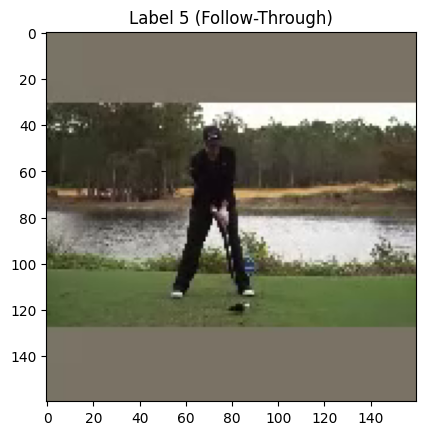

In [12]:
import cv2

ctr = 0
video_path = './Professional.mp4'
cap = cv2.VideoCapture(video_path)
highest_conf_frames = {}
follow_through_count = 0

label_order = [1, 2, 3, 4, 5]

while cap.isOpened():
    # Read in the frame
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_image = cv2.resize(frame, (input_size, input_size))
    input_image = tf.expand_dims(input_image, axis=0)

    keypoint_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    keypoints_with_scores = movenet(input_image, keypoint_indices)
    extract_angle = extract_angles(input_image, keypoint_indices)


    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf1.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    test_prediction += 1  # add 1 to test_prediction
    label_name = {
        1: "Address",
        2: "Impact",
        3: "Mid-Backswing",
        4: "Mid-Downswing",
        5: "Mid-Follow-Through"
    }[test_prediction]
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")
    # print(extract_angle)

    
    

    annotated_image = frame.copy()
    output_overlay = draw_prediction_on_image(frame, keypoints_with_scores)

    if test_prediction not in highest_conf_frames or test_confidence > highest_conf_frames[test_prediction][0]:
        highest_conf_frames[test_prediction] = (test_confidence, annotated_image)

    if test_prediction == 5:
        follow_through_count += 1

        # # Stop displaying "Mid-Follow-Through" label frames after 20 frames have been displayed
        # if follow_through_count > 20:
        #     break
    cv2.imshow('output_overlay', output_overlay)
    
    if follow_through_count > 20:
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Display the highest confidence level frames for each predicted label
for label in label_order:
    if label in highest_conf_frames:
        (confidence, frame) = highest_conf_frames[label]
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Backswing",
            4: "Downswing",
            5: "Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) has highest confidence level of {confidence:.2f}%")
        plt.imshow(frame)
        plt.title(f"Label {label} ({label_name})")
        plt.show()

[[ 1.7491924   2.96975812 -1.11005184 -1.41965529 -0.05394154  0.17721106
   6.77090767 12.63678522]]
Predicted label: Address, confidence: 92.65%
[[ 1.71686281  3.01254495 -1.12184691 -1.44388829  0.04357842  0.15943126
   7.00729846 12.48674005]]
Predicted label: Address, confidence: 89.36%
[[ 1.76346682  2.98193699 -1.05484623 -1.43664582 -0.18602805  0.38746535
   6.81612251 12.65380326]]
Predicted label: Address, confidence: 93.89%
[[ 1.73178962  2.96889571 -1.07697729 -1.44445251 -0.20963247  0.37073401
   6.76240005 12.54399893]]
Predicted label: Address, confidence: 93.90%
[[ 1.77140246  2.91592163 -1.09158876 -1.43822692 -0.13702313  0.34144492
   6.82542788 12.53289572]]
Predicted label: Address, confidence: 93.36%
[[ 1.83188805  2.89927272 -1.1002252  -1.43663465 -0.07606408  0.24562454
   6.91581506 12.56351361]]
Predicted label: Address, confidence: 92.14%
[[ 1.83090103  2.83554422 -1.10057551 -1.44402405 -0.19105375  0.3696588
   6.76690223 12.63796782]]
Predicted label: 

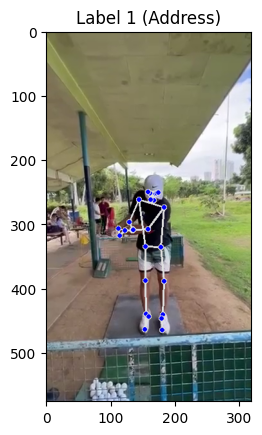

In [21]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

min_detection_confidence = 0.5
min_tracking_confidence = 0.5

video_file = '2.mp4'
cap = cv2.VideoCapture(video_file)

highest_conf_frames = {}
follow_through_count = 0


label_order = [1, 2, 3, 4, 5]

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

   
    with mp_pose.Pose(min_detection_confidence=min_detection_confidence,
                      min_tracking_confidence=min_tracking_confidence) as pose:
        results = pose.process(frame)
        
        test_value = extract_angles_test(results)
        # print(test_value)
        
        test_scaled_value = scaler.transform(test_value) #Sayop
        print(test_scaled_value)
        test_answer = clf.predict(test_scaled_value)
        # print(test_answer)
        test_probabilities = clf.predict_proba(test_scaled_value)
        test_prediction = np.argmax(test_probabilities)
        test_confidence = test_probabilities[0][test_prediction] * 100
        test_prediction += 1  # add 1 to test_prediction
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[test_prediction]
        print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")

        if not results.pose_landmarks or len(results.pose_landmarks.landmark) != 33:
            continue

        annotated_image = frame.copy()
        mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        if test_prediction not in highest_conf_frames or test_confidence > highest_conf_frames[test_prediction][0]:
            highest_conf_frames[test_prediction] = (test_confidence, annotated_image)

        if test_prediction == 5:
            follow_through_count += 1

            if follow_through_count > 20:
                break
    cv2.imshow('Pose Detection', annotated_image)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
for label in label_order:
    if label in highest_conf_frames:
        (confidence, frame) = highest_conf_frames[label]
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) has highest confidence level of {confidence:.2f}%")
        plt.imshow(frame)
        plt.title(f"Label {label} ({label_name})")
        plt.show()

In [17]:
def draw_pose_lines(frame, keypoints_with_scores):
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    connections = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (10, 11),
                   (8, 12), (12, 13), (13, 14), (14, 15), (0, 16), (16, 17), (17, 18), (18, 19), (0, 15), (15, 22),
                   (22, 23), (23, 24), (0, 19), (19, 20), (20, 21)]
    for connection in connections:
        start = keypoints_with_scores[connection[0]]
        end = keypoints_with_scores[connection[1]]
        if start[2] > 0.5 and end[2] > 0.5:  
            cv2.line(frame, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), colors[0], 3)
    for keypoint in keypoints_with_scores:
        if keypoint[2] > 0.5:  
            cv2.circle(frame, (int(keypoint[0]), int(keypoint[1])), 5, colors[1], -1)

    return frame

In [18]:
import cv2
import os

ctr = 0
video_path = '0.mp4'
cap = cv2.VideoCapture(video_path)
highest_conf_frames = {}
follow_through_count = 0
label_order = [1, 2, 3, 4, 5]

net = cv2.dnn.readNetFromTensorflow('graph_opt.pb')

inWidth = 368
inHeight = 368

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pose_frames = poseFrames(frame)
    LElbowAngle = calculate_angles_movenet(pose_frames[8], pose_frames[7], pose_frames[6])
    RElbowAngle = calculate_angles_movenet(pose_frames[5], pose_frames[4], pose_frames[3]) 
    LShoulderAngle = calculate_angles_movenet(pose_frames[7], pose_frames[6], pose_frames[12]) 
    RShoulderAngle = calculate_angles_movenet(pose_frames[4], pose_frames[3], pose_frames[9]) 
    LHipsAngle = calculate_angles_movenet(pose_frames[6], pose_frames[12], pose_frames[13]) 
    RHipsAngle = calculate_angles_movenet(pose_frames[3], pose_frames[9], pose_frames[10]) 
    LKneeAngle = calculate_angles_movenet(pose_frames[12], pose_frames[13], pose_frames[14]) 
    RKneeAngle = calculate_angles_movenet(pose_frames[9], pose_frames[10], pose_frames[11])

    extract_angle = [[LElbowAngle, RElbowAngle, LShoulderAngle, RShoulderAngle, LHipsAngle, RHipsAngle, LKneeAngle, RKneeAngle]]
    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf2.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    test_prediction += 1  # add 1 to test_prediction
    label_name = {
        1: "Address",
        2: "Impact",
        3: "Mid-Backswing",
        4: "Mid-Downswing",
        5: "Mid-Follow-Through"
    }[test_prediction]
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.imshow('Video', frame)

cap.release()
cv2.destroyAllWindows()

for label in label_order:
    if label in highest_conf_frames:
        (confidence, frame) = highest_conf_frames[label]
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) has highest confidence level of {confidence:.2f}%")
        plt.imshow(frame)
        plt.title(f"Label {label} ({label_name})")
        plt.show()
    else:
        label_name = {
            1: "Address",
            2: "Impact",
            3: "Mid-Backswing",
            4: "Mid-Downswing",
            5: "Mid-Follow-Through"
        }[label]
        print(f"Label {label} ({label_name}) did not show in the video")

Predicted label: Address, confidence: 34.59%
Predicted label: Address, confidence: 33.75%
Predicted label: Address, confidence: 33.92%
Predicted label: Address, confidence: 34.09%
Predicted label: Address, confidence: 33.92%
Predicted label: Address, confidence: 33.68%
Predicted label: Address, confidence: 33.26%
Predicted label: Address, confidence: 33.55%
Predicted label: Address, confidence: 34.98%
Predicted label: Address, confidence: 39.45%
Predicted label: Address, confidence: 38.37%
Predicted label: Address, confidence: 38.52%
Predicted label: Address, confidence: 33.60%
Predicted label: Address, confidence: 33.36%
Predicted label: Address, confidence: 33.32%
Predicted label: Address, confidence: 33.35%
Predicted label: Address, confidence: 33.75%
Predicted label: Address, confidence: 31.28%
Predicted label: Address, confidence: 31.44%
Predicted label: Address, confidence: 33.54%
Predicted label: Address, confidence: 31.44%
Predicted label: Address, confidence: 30.83%
Predicted 

In [19]:
import cv2
import os


def draw_pose_lines(frame, pose_frames):
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

    connections = [(0, 1), (1, 2), (2, 3), (3, 4), (1, 5), (5, 6), (6, 7), (1, 8), (8, 9), (9, 10), (10, 11),
                   (8, 12), (12, 13), (13, 14), (14, 15), (0, 16), (16, 17), (17, 18), (18, 19), (0, 15), (15, 22),
                   (22, 23), (23, 24), (0, 19), (19, 20), (20, 21)]
    for connection in connections:
        start = pose_frames[connection[0]]
        end = pose_frames[connection[1]]
        cv2.line(frame, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), colors[0], 3)

    for pose_frame in pose_frames:
        cv2.circle(frame, (int(pose_frame[0]), int(pose_frame[1])), 5, colors[1], -1)


ctr = 0
image_dir = './GolfDB_Dataset/Mid-Follow-Through/'

image_filenames = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir)
                   if os.path.isfile(os.path.join(image_dir, filename))]

image_filenames = sorted(image_filenames, key=lambda x: int(os.path.splitext(os.path.basename(x))[0]))

net = cv2.dnn.readNetFromTensorflow('graph_opt.pb')
inWidth = 368
inHeight = 368

for filename in image_filenames:
    frame = cv2.imread(filename)

    pose_frames = poseFrames(frame)

    LElbowAngle = calculate_angles_movenet(pose_frames[8], pose_frames[7], pose_frames[6])
    RElbowAngle = calculate_angles_movenet(pose_frames[5], pose_frames[4], pose_frames[3]) 
    LShoulderAngle = calculate_angles_movenet(pose_frames[7], pose_frames[6], pose_frames[12]) 
    RShoulderAngle = calculate_angles_movenet(pose_frames[4], pose_frames[3], pose_frames[9]) 
    LHipsAngle = calculate_angles_movenet(pose_frames[6], pose_frames[12], pose_frames[13]) 
    RHipsAngle = calculate_angles_movenet(pose_frames[3], pose_frames[9], pose_frames[10]) 
    LKneeAngle = calculate_angles_movenet(pose_frames[12], pose_frames[13], pose_frames[14]) 
    RKneeAngle = calculate_angles_movenet(pose_frames[9], pose_frames[10], pose_frames[11])

    extract_angle = [[LElbowAngle, RElbowAngle, LShoulderAngle, RShoulderAngle, LHipsAngle, RHipsAngle, LKneeAngle, RKneeAngle]]
    test_scaled_value = scaler.transform(extract_angle)
    test_probabilities = clf2.predict_proba(test_scaled_value)
    test_prediction = np.argmax(test_probabilities)
    test_confidence = test_probabilities[0][test_prediction] * 100
    print(f"Predicted label: {label_name}, confidence: {test_confidence:.2f}%")
    cv2.imshow('image', frame)

    key = cv2.waitKey(0) & 0xFF

    if key == ord('q'):
        break

    ctr += 1
    if ctr >= 450:
        break

cv2.destroyAllWindows()


Predicted label: Mid-Follow-Through, confidence: 40.19%
Predicted label: Mid-Follow-Through, confidence: 37.41%
